In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


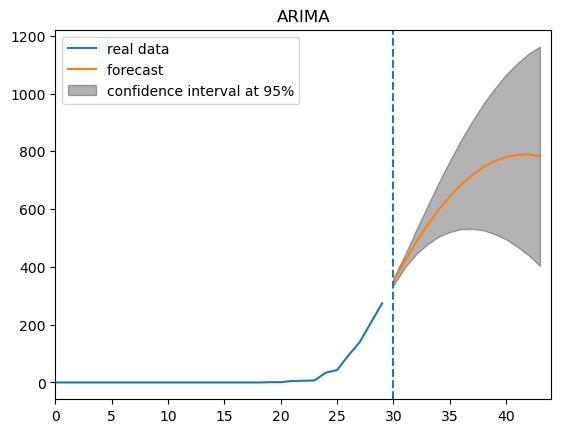

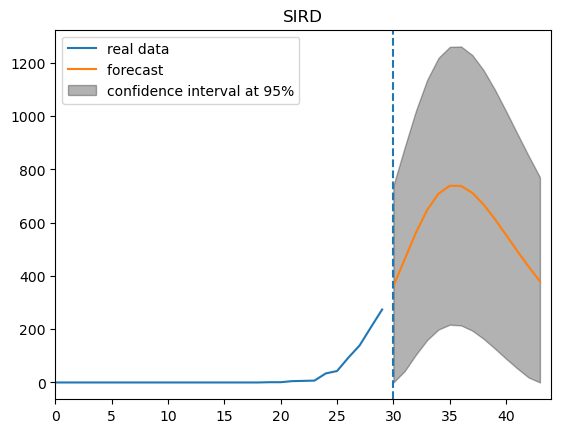

covariance method


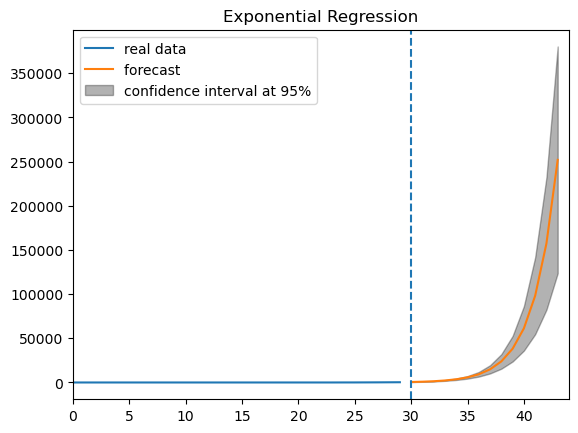

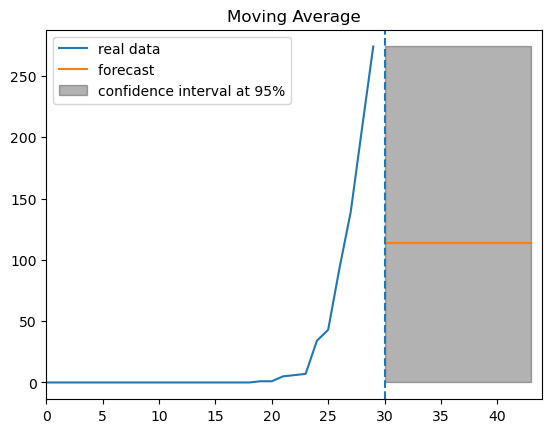

In [11]:
myarima=ARIMA_Model()
mySIRD=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
split=30
reach=14
alpha=0.05
myarima.train(dates_of_pandemic[:split], new_deaths[:split])
mySIRD.train(dates_of_pandemic[:split], new_deaths[:split])
myexp.train(dates_of_pandemic[:split], new_deaths[:split])
mymoving.train(dates_of_pandemic[:split], new_deaths[:split])
myarima.plot(reach, alpha, title='ARIMA')
mySIRD.plot(reach, alpha, title='SIRD')
myexp.plot(reach, alpha, title='Exponential Regression')
mymoving.plot(reach, alpha, title='Moving Average')


Comparison between SIRD2 with delta method and with samplings : 

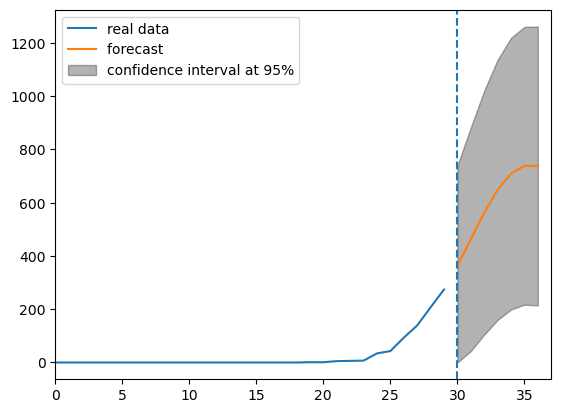

In [9]:
mysird2=SIRD_model_2()
mysird2.train(dates_of_pandemic[:30], new_deaths[:30])
mysird2.plot(7,0.05)

# multivariate sampling with intervals based on delta method

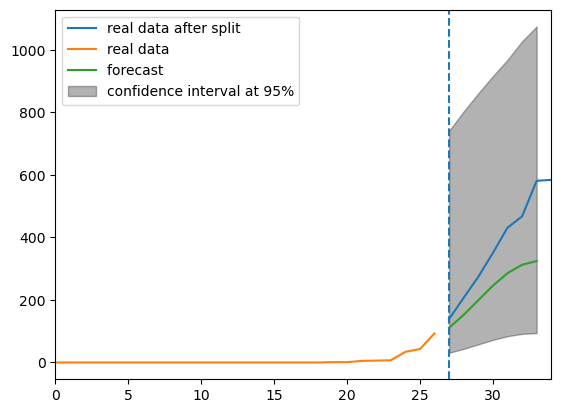

In [24]:
mysird2=SIRD_model_2()
split=27
reach=7
mysird2.train(dates_of_pandemic[:split], new_deaths[:split])
plt.plot(dates_of_pandemic[split:], new_deaths[split:], label='real data after split')
mysird2.plot(reach,0.05)



In [6]:

s_0=1000000 -1
i_0=1
r_0=0
d_0=0

t=len(death_cumul-1)
dt=0.001

x0=[s_0, i_0, r_0, d_0]

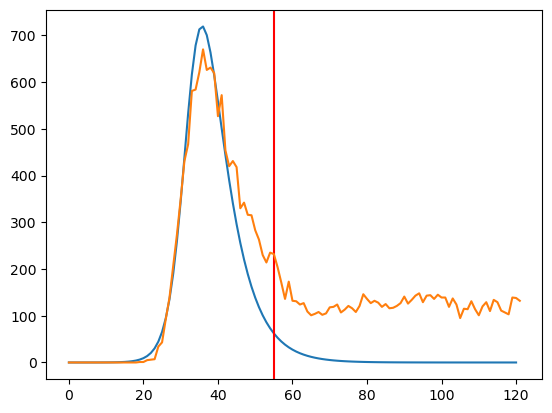

In [21]:
plt.plot(differenciate(np.array(run_sir(x0, mysird2.beta, mysird2.gamma, mysird2.d, t, dt))[3]))
plt.axvline(55, color='red')
plt.plot(new_deaths)

In [4]:
mysird2.beta, mysird2.gamma, mysird2.d

(0.605032120334106, 0.2, 0.002410204187117382)

**Evaluating models**

In [1]:
import sys
sys.path.append('./models/')
from Arima import ARIMA_Model
from SIR  import *
from exponential_regression import ExponentialRegression
from moving_average import MovingAverage
from Truth import Truth
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from evaluate_model import evaluate_model

df = pd.read_csv('deaths_and_infections.csv')

# remove a columns from a df: 
df.drop(columns=['Unnamed: 0'], inplace=True)
new_deaths=np.array(df['new_deaths'])
death_cumul=np.array([sum(new_deaths[:i]) for i in range(len(new_deaths))])
dates_of_pandemic=np.arange(len(new_deaths))

In [2]:
myarima=ARIMA_Model()
mysir=SIRD_model_2()
myexp=ExponentialRegression()
mymoving=MovingAverage()
truth=Truth()
alphas=[0.05,0.1,0.5]
index_points=[30]
reach=7
weights=[1,1,1,1]


In [3]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
dispersion for alpha =  0.05
the interval is:  (119.55199357531978, 1344.3420434676)

dispersion for alpha =  0.1
the interval is:  (128.156831174565, 1294.709062378066)

dispersion for alpha =  0.5
the interval is:  (600.6900296423914, 992.5617279053904)



814.6925704854245

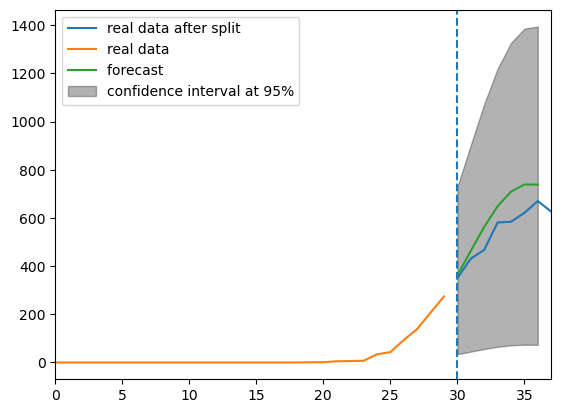

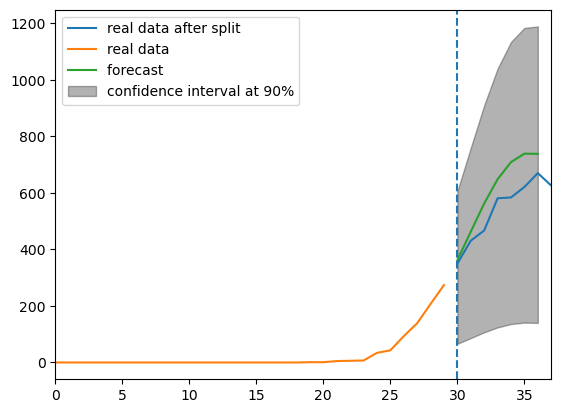

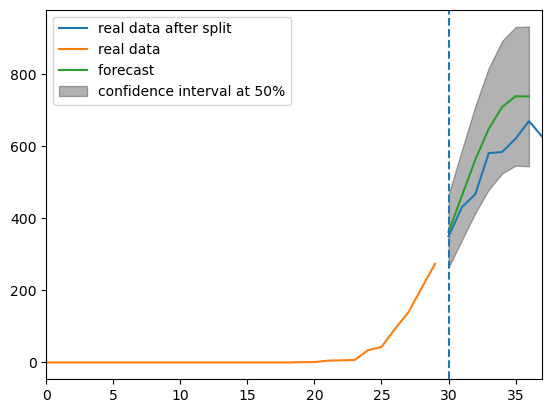

In [11]:
mysir.train(dates_of_pandemic[:30], new_deaths[:30])
plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.05)

plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.1)


plt.plot(dates_of_pandemic[30:], new_deaths[30:], label='real data after split')
mysir.plot(reach,0.5)

In [6]:
evaluate_model(model=truth, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


0.0

In [4]:
evaluate_model(model=truth, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


0.0

In [7]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


196.74120170056491

In [5]:
evaluate_model(model=myarima, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\grego\Miniconda3\envs\env_qcm\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


196.74120170056491

In [8]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


780.8320488975481

In [6]:
evaluate_model(model=mysir, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


837.716952036619

In [9]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
covariance method
covariance method
covariance method
underprediction
point 670.0
l 6683.697282067345
underprediction
point 670.0
l 7101.858602213807
underprediction
point 670.0
l 8389.561878080918


120010.14049179564

In [7]:
evaluate_model(model=myexp, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30
covariance method
covariance method
covariance method


120010.14049179564

In [10]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


7505.162207609593

In [8]:
evaluate_model(model=mymoving, data=new_deaths, alphas=alphas, evaluation_point_indexs=index_points, reach=reach, weights=weights)

30


7092.687903440425